# SYRIATEL CUSTOMER CHURN CLASSIFICATION PROJECT

## BUSINESS UNDERSTANDING

### Project Overview
The objective of this project is to build a classifier that predicts whether a customer will "soon" stop doing business with SyriaTel, a telecommunications company.
This is a binary classification problem, where the model will predict customer churn based on various features. By analyzing historical customer data, we aim to uncover patterns and factors that are indicative of customer churn. This will enable SyriaTel to take proactive measures to retain customers and reduce potential revenue loss.
Churn prediction is crucial for the company to implement retention strategies and improve customer satisfaction.


### Business Problem
**Objective**: Predict whether a customer will churn ("soon" stop doing business with SyriaTel). 

**Importance**: Understanding customer churn is critical for SyriaTel to minimize revenue loss and enhance customer loyalty. By identifying the patterns and factors that lead to churn, SyriaTel can implement targeted retention strategies, improve overall customer satisfaction, and reduce the financial impact of losing customers. The core question to address is: Are there predictable patterns in the customer data that can help in identifying customers at risk of churning, and how can these insights be used to retain them?

### Stakeholders
- **Primary Stakeholder**: SyriaTel, a telecommunications company interested in reducing customer churn and improving customer retention.
- **Secondary Stakeholders**:
  - **Customer Service Teams**: To develop strategies and interventions for retaining customers identified as high risk.
  - **Marketing Teams**: To create targeted campaigns and offers aimed at at-risk customers.
  - **Financial Analysts**: To evaluate the financial impact of customer churn and measure the effectiveness of retention strategies.

## DATA UNDERSTANDING

### Data Overview
- The dataset used in this project is the SyriaTel Customer Churn dataset. This dataset includes customer information and their usage patterns with SyriaTel. The goal is to build a classifier to predict customer churn based on these features.


### Data Description
The dataset contains the following features:
- `state`: State where the customer resides
- `account length`: The length of the customer’s account
- `area code`: The area code of the customer's phone number
- `phone number`: Customer’s phone number
- `international plan`: Whether the customer has an international plan
- `voice mail plan`: Whether the customer has a voice mail plan
- `number vmail messages`: Number of voice mail messages
- `total day minutes`: Total minutes of day calls
- `total day calls`: Total number of day calls
- `total day charge`: Total charge for day calls
- `total eve minutes`: Total minutes of evening calls
- `total eve calls`: Total number of evening calls
- `total eve charge`: Total charge for evening calls
- `total night minutes`: Total minutes of night calls
- `total night calls`: Total number of night calls
- `total night charge`: Total charge for night calls
- `total intl minutes`: Total minutes of international calls
- `total intl calls`: Total number of international calls
- `total intl charge`: Total charge for international calls
- `customer service calls`: Number of customer service calls
- `churn`: Target variable indicating whether the customer has churned (TRUE/FALSE)

### Data Exploration

In [30]:
# Import the relevant libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the dataset
df = pd.read_csv('churn.csv')

In [31]:
# Display the first 10 rows of the dataset
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [32]:
# Display the last 10 rows of the dataset
df.tail(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3323,IN,117,415,362-5899,no,no,0,118.4,126,20.13,...,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,377-1164,no,no,0,169.8,114,28.87,...,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,368-8555,no,no,0,193.4,99,32.88,...,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,347-6812,no,no,0,106.6,128,18.12,...,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [33]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [34]:
# Data types
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [35]:
# Summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


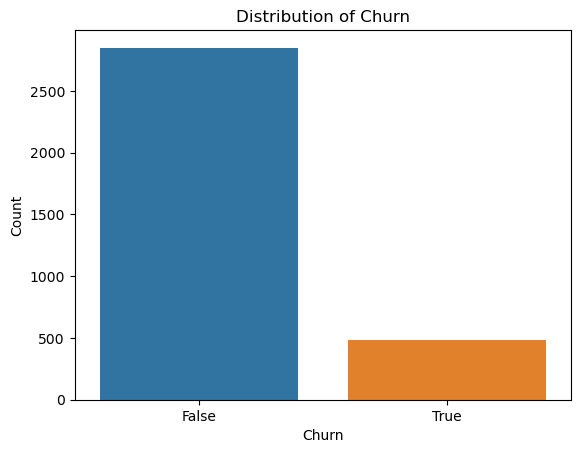

In [36]:

# Plot for Distribution of Churn to understand the proportion of customers who have churned vs those who haven't
sns.countplot(data=df, x='churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

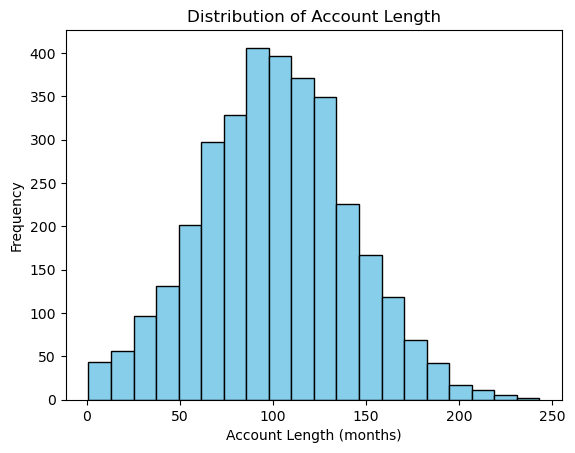

In [37]:
# Plot for the Distribution of Account Length(key feature)

plt.hist(df['account length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Account Length')
plt.xlabel('Account Length (months)')
plt.ylabel('Frequency')
plt.show()

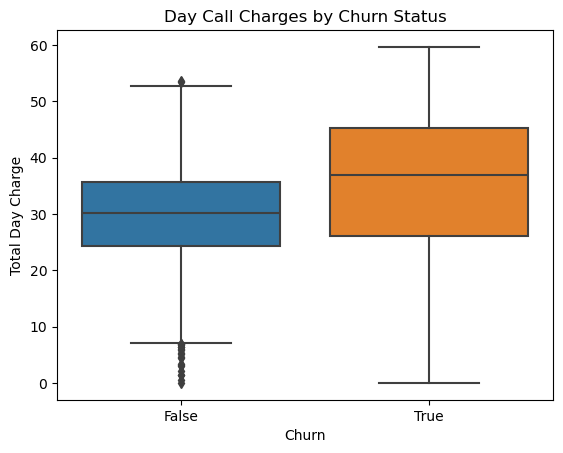

In [38]:
# Plot for day call charges by churn status

sns.boxplot(data=df, x='churn', y='total day charge')
plt.title('Day Call Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Day Charge')
plt.show()

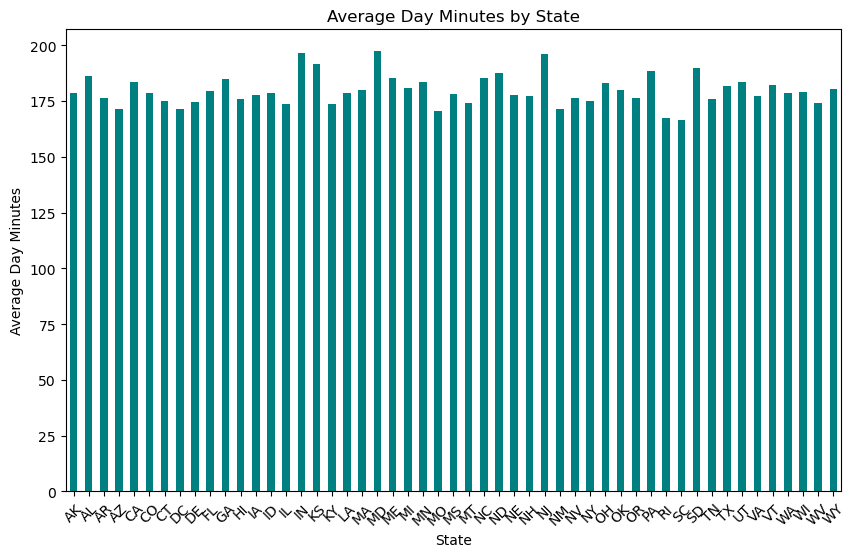

In [39]:
# Plot for average day minutes spent ny customers in different states

state_day_minutes = df.groupby('state')['total day minutes'].mean()

plt.figure(figsize=(10, 6))
state_day_minutes.plot(kind='bar', color='teal')
plt.title('Average Day Minutes by State')
plt.xlabel('State')
plt.ylabel('Average Day Minutes')
plt.xticks(rotation=45)
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

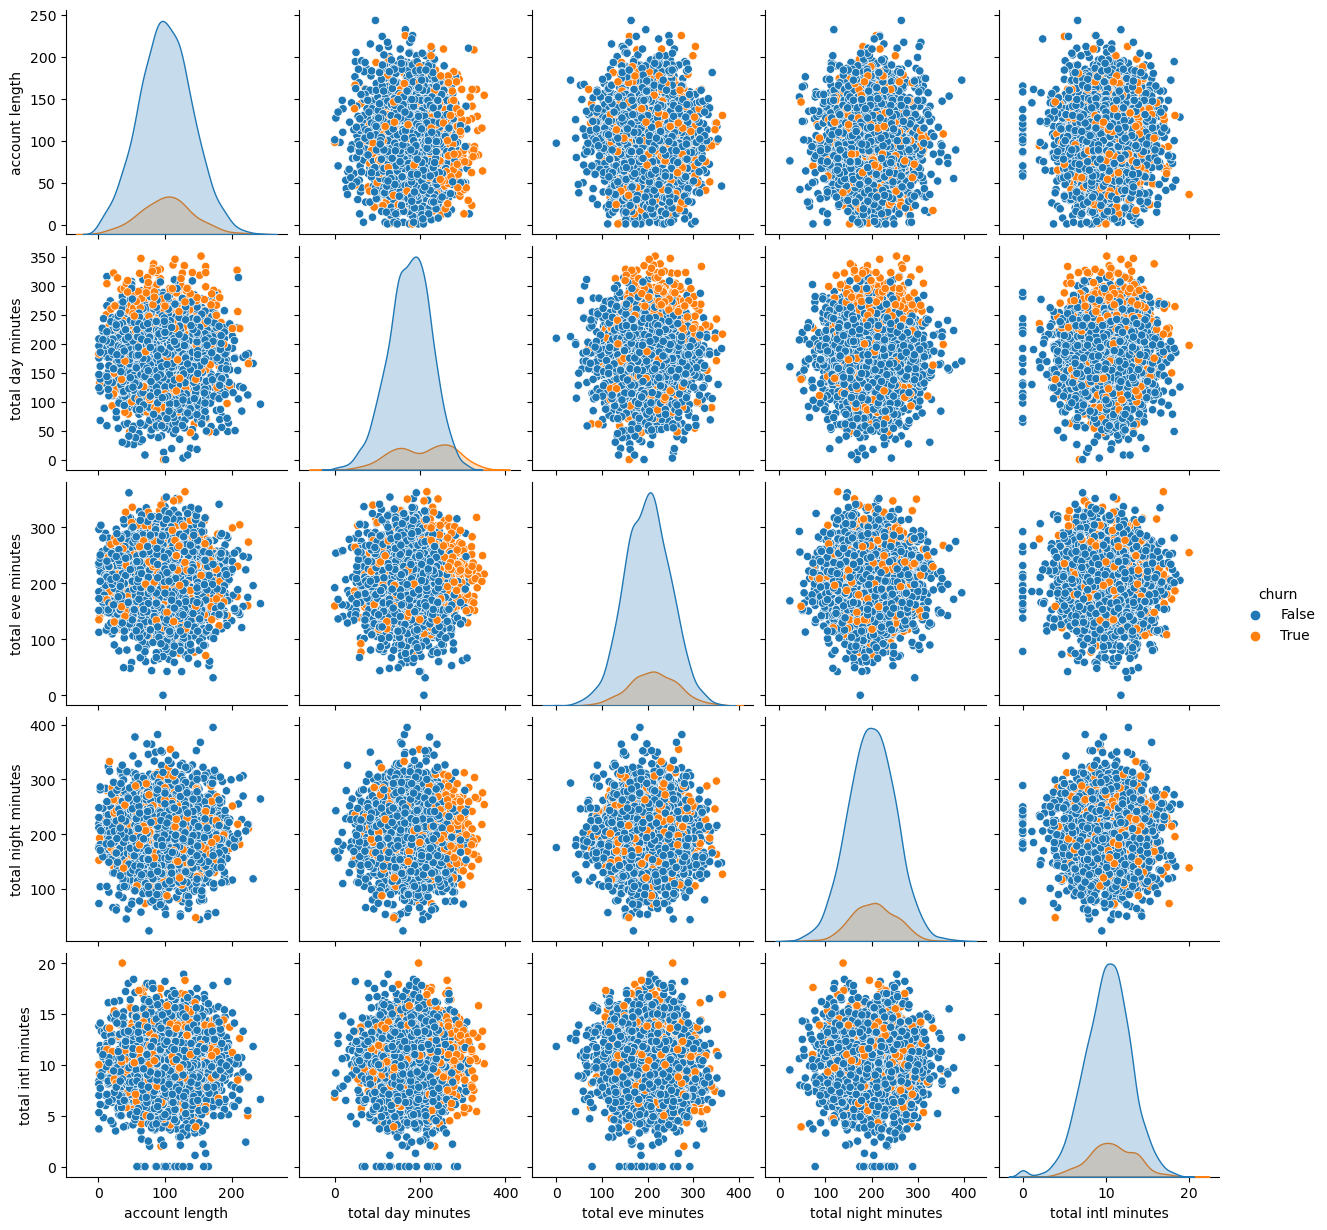

In [40]:
# Pair plot of selected features

# Select a subset of features for the pair plot
features = ['account length', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'churn']
sns.pairplot(df[features], hue='churn')
plt.show()


In [41]:
# Identify relationships between numerical features in the dataset

# Compute the correlation matrix
#corr = df.corr()

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
#plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
#sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#plt.title('Correlation Matrix')
#plt.show()


## DATA PREPARATION

### Data Cleaning

In [42]:
# Check for duplicates.
df.duplicated()
df.loc[df.duplicated()]
# Implication: No duplicates

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


In [43]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [44]:
# Check for outliers

numerical_features = df.select_dtypes(include=[np.number]).columns
X = df[numerical_features]


In [45]:
# Calculate IQR for each numerical feature
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))
print("Number of outliers detected:", outliers.sum().sum())


Number of outliers detected: 682


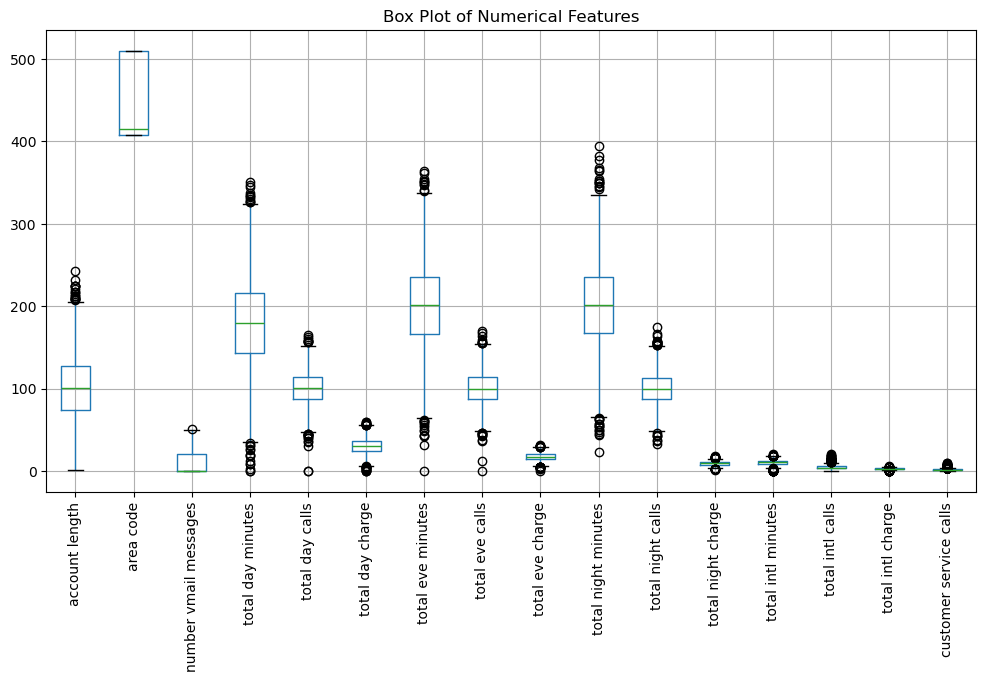

In [46]:
# Box plot for the outliers

X.boxplot(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Features')
plt.show()


In [47]:
# Checking numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical Columns:", numerical_columns)

# Checking categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)


Numerical Columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')
Categorical Columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


In [48]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['churn', 'phone number'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 19), (1000, 19), (2333,), (1000,))

### Feature Engineering and Scaling

In [49]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Defining categorical and numerical columns
categorical_cols = ['state', 'international plan', 'voice mail plan']
numerical_cols = ['account length', 'total day minutes', 'total eve minutes', 
                  'total night minutes', 'total intl minutes', 'customer service calls']

# Create preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the data
X_prepared = preprocessor.fit_transform(df.drop(columns=['churn', 'phone number']))
X_prepared


<3333x61 sparse matrix of type '<class 'numpy.float64'>'
	with 29997 stored elements in Compressed Sparse Row format>

### Data Splitting

In [50]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['churn', 'phone number'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 19), (1000, 19), (2333,), (1000,))

In [51]:
# Apply the preprocessing steps to the training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
X_train_transformed, X_test_transformed


(<2333x61 sparse matrix of type '<class 'numpy.float64'>'
 	with 20997 stored elements in Compressed Sparse Row format>,
 <1000x61 sparse matrix of type '<class 'numpy.float64'>'
 	with 9000 stored elements in Compressed Sparse Row format>)

### Addressing Class Imbalance

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)
X_train_balanced, y_train_balanced


(<3990x61 sparse matrix of type '<class 'numpy.float64'>'
 	with 37770 stored elements in Compressed Sparse Row format>,
 0       False
 1        True
 2        True
 3       False
 4       False
         ...  
 3985     True
 3986     True
 3987     True
 3988     True
 3989     True
 Name: churn, Length: 3990, dtype: bool)

### Feature Selection

In [53]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Recursive Feature Elimination (RFE) with Cross-Validation
model = LogisticRegression(max_iter=500, solver='liblinear')  # Reduced max_iter

# Fit RFECV on the training data
rfe_selector = RFECV(estimator=model, step=2, cv=3, scoring='accuracy', n_jobs=-1)  # Optimized step size and cv
rfe_selector.fit(X_train_balanced, y_train_balanced)

# Check which features were selected from the training set
selected_rfe_features = X_train_balanced.columns[rfe_selector.support_]  # Ensure you're using columns from X_train_balanced
print("Selected Features (RFE):", selected_rfe_features)

# Plot the number of features vs. cross-validation score
plt.figure(figsize=(8, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfe_selector.grid_scores_) + 1), rfe_selector.grid_scores_)
plt.show()


AttributeError: 'csr_matrix' object has no attribute 'columns'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

feature_selector = SelectFromModel(RandomForestClassifier(random_state=42), threshold='median')
# Creating a Pipeline for the entire process
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),git 
    ('smote', smote),  # Apply SMOTE for oversampling
    ('feature_selection', feature_selector),
    ('classifier', RandomForestClassifier(random_state=42))
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['account length',
                                                   'total day minutes',
                                                   'total eve minutes',
                                                   'total night minutes',
                                                   'total intl minutes',
                                                   'customer service calls']),
                                                 ('cat', OneHotEncoder(),
                                                  ['state',
                                                   'international plan',
                                                   'voice mail plan'])])),
                ('smote', SMOTE(random_state=42)),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                                 threshold='median')),
                ('classifier', RandomForestClassifier(random_state=42))])

## Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split

### Baseline Model-Logistic Regression

In [54]:
# Build the Logistic Regression model with preprocessing
log_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Train the model
log_pipeline.fit(X_train_balanced, y_train_balanced)

# Evaluate the Logistic Regression model
y_pred_log_train = log_pipeline.predict(X_train_balanced)
y_pred_log_test = log_pipeline.predict(X_test)

# Metrics for the train set
print("Train Accuracy (Logistic Regression):", accuracy_score(y_train_balanced, y_pred_log_train))
print("Train Precision (Logistic Regression):", precision_score(y_train_balanced, y_pred_log_train))
print("Train Recall (Logistic Regression):", recall_score(y_train_balanced, y_pred_log_train))
print("Train F1-Score (Logistic Regression):", f1_score(y_train_balanced, y_pred_log_train))

# Metrics for the test set
print("Test Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_log_test))
print("Test Precision (Logistic Regression):", precision_score(y_test, y_pred_log_test))
print("Test Recall (Logistic Regression):", recall_score(y_test, y_pred_log_test))
print("Test F1-Score (Logistic Regression):", f1_score(y_test, y_pred_log_test))

# Confusion matrix and classification report for Logistic Regression
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_log_test))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log_test))

ValueError: Specifying the columns using strings is only supported for pandas DataFrames